# Vectorized Implementation of Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
data = pd.read_csv('./Dataset/Iris.csv') # Loading the dataset
print('Shape of the dataset:' , data.shape)

Shape of the dataset: (150, 6)


In [3]:
data.head() # Peeking the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


We will shuffle our data as the classes of the data set are not randomly ordered and we need randomly ordered dataset to make our model work on unknown data

In [5]:
data = data.sample(frac=1) # Shuffling our data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
8,9,4.4,2.9,1.4,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
138,139,6.0,3.0,4.8,1.8,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa


The id column is not signifiacant for the prediction purposes so we will drop it.
The classes to be predicted are in string format so we will change them into numerical data

In [6]:
data.drop(columns=['Id'], inplace=True)
data = pd.get_dummies(data, dummy_na=False, columns=['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
134,6.1,2.6,5.6,1.4,0,0,1
8,4.4,2.9,1.4,0.2,1,0,0
15,5.7,4.4,1.5,0.4,1,0,0
138,6.0,3.0,4.8,1.8,0,0,1
18,5.7,3.8,1.7,0.3,1,0,0


In [7]:
X = data.drop(columns=['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'])
Y = data.get(['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica'])

In [8]:
split = 0.1
train_X = np.asarray(X[:-int(split*data.shape[0])])
train_Y = np.asarray(Y[:-int(split*data.shape[0])])

test_X = np.asarray(X[-int(split*data.shape[0]):])
test_Y = np.asarray(Y[-int(split*data.shape[0]):])

print('Shape of training data:\nX: {}\tY: {}'.format(train_X.shape, train_Y.shape))
print('Shape of testing data:\nX: {}\tY: {}'.format(test_X.shape, test_Y.shape))

Shape of training data:
X: (135, 4)	Y: (135, 3)
Shape of testing data:
X: (15, 4)	Y: (15, 3)


In [9]:
# Sigmoid loss function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
# Initializing the weights and biases
w = np.random.normal(loc=0.0, scale=0.01, size=(X.shape[1], Y.shape[1]))
b = np.random.normal(loc=0.0, scale=0.01, size=(1, Y.shape[1]))
print(w.shape, b.shape)

(4, 3) (1, 3)


In [11]:
def gradient_descent(w, b, learning_rate, num_epochs, X, Y):
    """ Function for finiding the best descision boundary interatively"""
    
    global loss
    for i in tqdm(range(num_epochs)):
        
        # Input Parameters
        z = np.add(np.dot(X, w), b)
        a = sigmoid(z)

        # Loss
        l = np.sum(-(Y*np.log(a) + (1-Y)*np.log(1-a)))
        loss.append(l)
        
        # Gradients
        dz = a - Y
        dw = np.dot(X.T, dz)
        db = np.sum(a - Y, axis=0, keepdims=True)
        
        # Parameter update
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
    return w, b

In [12]:
loss = []
weights, biases = gradient_descent(w, b, 1e-3, 1000, train_X, train_Y)

100%|██████████| 1000/1000 [00:00<00:00, 9784.16it/s]


In [13]:
print('Initial biases: {}'.format(b))
print('Biase after running optimisation: {}'.format(biases))

Initial biases: [[-0.01282903  0.01283485  0.01687712]]
Biase after running optimisation: [[ 0.33342182  1.17806351 -1.42254866]]


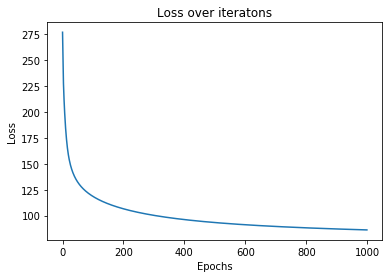

In [14]:
plt.plot(loss)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss over iteratons')
plt.show()

In [15]:
# Calculating the accuracy on unseen data
Y_pred = []
Y_true = []
pred = np.add(np.dot(test_X, weights), biases)

for i in range(test_Y.shape[0]):
    Y_true.append(np.argmax(test_Y[i]))
    Y_pred.append(np.argmax(pred[i]))
    
acc = np.sum(np.equal(Y_pred, Y_true))
print('Accuracy on test data: {}%'.format(acc/test_X.shape[0]*100))

Accuracy on test data: 93.33333333333333%
